In [20]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [21]:
wi = pd.read_csv('data_absentee_voting/wisconsin_absentee_data.csv')

ga = pd.read_csv('data_absentee_voting/georgia_absentee_data.csv', header = 2)

fl = pd.read_csv('data_absentee_voting/florida_absentee_data.txt', sep = '	', header = 0 )

nc = pd.read_csv('data_absentee_voting/nc_absentee.txt', sep = '	', header = 0)

In [22]:
fl.head()

,ElectionNumber,ElectionDate,ElectionName,CountyName,StatType,TotalRep,TotalDem,TotalOth,TotalNpa,GrandTotal,CompileDate
0,10866,11/03/2020,2020 General Election,State Totals,Voted Vote-by-Mail,"1,506,223","2,189,710","66,345","1,093,399","4,855,677",11/18/2020 11:08AM
1,10866,11/03/2020,2020 General Election,Alachua,Voted Vote-by-Mail,"12,163","37,139",753,"11,597","61,652",11/18/2020 8:26AM
2,10866,11/03/2020,2020 General Election,Baker,Voted Vote-by-Mail,"1,605",978,26,232,"2,841",11/18/2020 8:26AM
3,10866,11/03/2020,2020 General Election,Bay,Voted Vote-by-Mail,"13,569","10,292",463,"4,640","28,964",11/18/2020 8:26AM
4,10866,11/03/2020,2020 General Election,Bradford,Voted Vote-by-Mail,"1,891","1,531",32,377,"3,831",11/18/2020 8:26AM


In [23]:
nc.head()

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
0,TYRRELL,11/03/2020,3,1359,S,NC TREASURER,Ronnie Chatterji,DEM,1,16,0,0,0,16,Y,NaN
1,WAYNE,11/03/2020,06,1011,S,NC COURT OF APPEALS JUDGE SEAT 05,Fred Gore,REP,1,95,0,0,0,95,Y,NaN
2,FORSYTH,11/03/2020,081,1342,S,NC SUPERINTENDENT OF PUBLIC INSTRUCTION,Jen Mangrum,DEM,1,204,1076,367,7,1654,Y,NaN
3,NEW HANOVER,11/03/2020,W03,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y,NaN
4,MECKLENBURG,11/03/2020,241,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,348,2257,0,0,2605,Y,NaN


In [24]:
ga.head()

,County,Election Day Votes,Absentee by Mail Votes,Advanced Voting Votes,Provisional Votes,Total Votes,Election Day Votes.1,Absentee by Mail Votes.1,Advanced Voting Votes.1,Provisional Votes.1,Total Votes.1,Election Day Votes.2,Absentee by Mail Votes.2,Advanced Voting Votes.2,Provisional Votes.2,Total Votes.2,Total
0,Appling,1753,890,3874,9,6526,334,587,855,3,1779,5,5,26,0,36,8341
1,Atkinson,716,164,1419,1,2300,250,130,445,0,825,14,3,13,0,30,3155
2,Bacon,431,487,3099,1,4018,140,196,288,1,625,8,4,13,0,25,4668
3,Baker,291,138,466,2,897,149,234,269,0,652,2,2,2,0,6,1555
4,Baldwin,1873,1290,5736,4,8903,1527,3000,4612,1,9140,63,38,107,0,208,18251


In [25]:
wi.head()

,Election,HINDI,Jurisdiction,AbsenteeApplications,BallotsSent,BallotsReturned,InPersonAbsentee
0,2020 General Election,1,ADAMS COUNTY,4962,4898,4454,1167
1,2020 General Election,2,ASHLAND COUNTY,3959,3945,3683,548
2,2020 General Election,3,BARRON COUNTY,11469,11421,10597,3563
3,2020 General Election,4,BAYFIELD COUNTY,5261,5212,4899,771
4,2020 General Election,5,BROWN COUNTY,103471,103217,98859,30207


In [62]:
votecount = pd.read_csv('data_absentee_voting/total_results_CONDENSED.csv')
votecount.head()

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04T10:43:52Z,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04T10:44:01Z,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04T10:44:01Z,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04T10:44:02Z,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04T10:44:03Z,47.90957,R+48,Trump +48,republican,47.90957,2


In [63]:
votecount['last_updated'] = votecount['last_updated'].str.replace('Z', ' ')
votecount['last_updated'] = votecount['last_updated'].str.replace('T', ' ')
votecount.head()

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04 10:43:52,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04 10:44:01,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04 10:44:01,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04 10:44:02,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:03,47.90957,R+48,Trump +48,republican,47.90957,2


In [64]:
votecount['last_updated'] = pd.to_datetime(votecount['last_updated'], format = '%Y-%m-%d %H:%M:%S')
votecount.head()
#datetime_object = datetime.strptime(votecount['last_updated'], '%Y-%m-%d %H:%M:%S')

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04 10:43:52,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04 10:44:01,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04 10:44:01,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04 10:44:02,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:03,47.90957,R+48,Trump +48,republican,47.90957,2


In [65]:
votecount.head(40)

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,AK,AK-G-P-2020-11-03,2901,ED 1,4251,955,5,9,56,7634,56%,56% reported,edison,2,unknown,None,4000,None,None,2322,1723,140,28.0,19.0,17.0,2.0,0.0,378,553,14,5.0,1.0,4.0,0.0,0.0,2020-11-04 10:43:52,14.0908,R+14,Trump +14,republican,14.0908,2
1,AK,AK-G-P-2020-11-03,2910,ED 10,4886,1369,5,11,47,10396,47%,47% reported,edison,2,unknown,None,4000,None,None,3835,863,139,31.0,10.0,7.0,1.0,0.0,1042,297,25,2.0,2.0,1.0,0.0,0.0,2020-11-04 10:44:01,60.82685,R+61,Trump +61,republican,60.82685,2
2,AK,AK-G-P-2020-11-03,2911,ED 11,5196,2441,4,9,47,11142,47%,47% reported,edison,2,unknown,None,4000,None,None,3740,1289,119,32.0,6.0,8.0,2.0,0.0,1576,806,45,11.0,0.0,3.0,0.0,0.0,2020-11-04 10:44:01,47.1709,R+47,Trump +47,republican,47.1709,2
3,AK,AK-G-P-2020-11-03,2912,ED 12,2309,1365,1,7,21,10974,21%,21% reported,edison,2,unknown,None,4000,None,None,1773,482,39,7.0,3.0,5.0,0.0,0.0,979,360,21,3.0,0.0,2.0,0.0,0.0,2020-11-04 10:44:02,55.91165,R+56,Trump +56,republican,55.91165,2
4,AK,AK-G-P-2020-11-03,2913,ED 13,3229,281,3,6,43,7513,43%,43% reported,edison,2,unknown,None,4000,None,None,2299,752,137,18.0,10.0,10.0,3.0,0.0,146,128,6,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:03,47.90957,R+48,Trump +48,republican,47.90957,2
5,AK,AK-G-P-2020-11-03,2914,ED 14,4050,0,2,7,34,11983,34%,34% reported,edison,2,unknown,None,4000,None,None,2984,882,143,18.0,5.0,16.0,2.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:04,51.90123,R+52,Trump +52,republican,51.90123,2
6,AK,AK-G-P-2020-11-03,2915,ED 15,2189,477,2,5,38,5729,38%,38% reported,edison,2,unknown,None,4000,None,None,1207,879,74,16.0,8.0,2.0,3.0,0.0,220,248,9,0.0,0.0,0.0,0.0,0.0,2020-11-04 10:44:05,14.98401,R+15,Trump +15,republican,14.98401,2
7,AK,AK-G-P-2020-11-03,2916,ED 16,3057,223,3,7,36,8551,36%,36% reported,edison,2,unknown,None,4000,None,None,1721,1196,96,25.0,7.0,9.0,3.0,0.0,51,166,5,0.0,0.0,1.0,0.0,0.0,2020-11-04 10:44:06,17.1737,R+17,Trump +17,republican,17.1737,2
8,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.2,Trump +0.2,republican,0.20024,2
9,AK,AK-G-P-2020-11-03,2918,ED 18,2966,1225,3,10,35,8512,35%,35% reported,edison,2,unknown,None,4000,None,None,1293,1576,46,33.0,6.0,10.0,2.0,0.0,416,785,10,9.0,1.0,3.0,1.0,0.0,2020-11-04 10:43:23,9.54147,D+10,Biden +10,democrat,-9.54147,2


In [66]:
votecount.dtypes

state                                     object
race_id                                   object
fips                                       int64
name                                      object
votes                                      int64
absentee_votes                             int64
reporting                                  int64
precincts                                  int64
eevp                                      object
tot_exp_vote                              object
eevp_value                                object
eevp_display                              object
eevp_source                               object
turnout_stage                             object
absentee_count_progress                   object
absentee_outstanding                      object
absentee_max_ballots                      object
provisional_outstanding                   object
provisional_count_progress                object
results-trumpd                             int64
results-bidenj      

In [68]:
ak = votecount[votecount.state=='AK']

In [71]:
ak = ak.sort_values(by=['last_updated'],ascending =1)
ak = ak.reset_index()
ak.head(40)

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes
0,6989,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.20,Trump +0.20,republican,0.20024,1520,4886
1,8,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.2,Trump +0.2,republican,0.20024,2,32299
2,9,AK,AK-G-P-2020-11-03,2918,ED 18,2966,1225,3,10,35,8512,35%,35% reported,edison,2,unknown,None,4000,None,None,1293,1576,46,33.0,6.0,10.0,2.0,0.0,416,785,10,9.0,1.0,3.0,1.0,0.0,2020-11-04 10:43:23,9.54147,D+10,Biden +10,democrat,-9.54147,2,35265
3,10,AK,AK-G-P-2020-11-03,2919,ED 19,2683,533,3,6,49,5511,49%,49% reported,edison,2,unknown,None,4000,None,None,1236,1332,61,25.0,2.0,16.0,11.0,0.0,151,369,7,2.0,0.0,2.0,2.0,0.0,2020-11-04 10:43:23,3.57808,D+4,Biden +4,democrat,-3.57808,2,37948
4,12,AK,AK-G-P-2020-11-03,2920,ED 20,3050,1053,3,9,37,8211,37%,37% reported,edison,2,unknown,None,4000,None,None,1242,1697,78,20.0,8.0,5.0,0.0,0.0,308,726,14,4.0,0.0,1.0,0.0,0.0,2020-11-04 10:43:23,14.91803,D+15,Biden +15,democrat,-14.91803,2,43342
5,13,AK,AK-G-P-2020-11-03,2921,ED 21,3364,482,3,8,34,9944,34%,34% reported,edison,2,unknown,None,4000,None,None,1657,1565,94,23.0,11.0,14.0,0.0,0.0,107,370,4,1.0,0.0,0.0,0.0,0.0,2020-11-04 10:43:25,2.73484,R+3,Trump +3,republican,2.73484,2,46706
6,14,AK,AK-G-P-2020-11-03,2922,ED 22,5001,1061,4,7,52,9628,52%,52% reported,edison,2,unknown,None,4000,None,None,3079,1776,113,18.0,8.0,5.0,2.0,0.0,493,542,17,4.0,4.0,0.0,1.0,0.0,2020-11-04 10:43:27,26.05479,R+26,Trump +26,republican,26.05479,2,51707
7,16,AK,AK-G-P-2020-11-03,2924,ED 24,5442,1344,4,7,51,10684,51%,51% reported,edison,2,unknown,None,4000,None,None,3454,1831,118,20.0,10.0,6.0,3.0,0.0,627,693,20,2.0,1.0,1.0,0.0,0.0,2020-11-04 10:43:28,29.82359,R+30,Trump +30,republican,29.82359,2,61351
8,15,AK,AK-G-P-2020-11-03,2923,ED 23,4202,925,4,8,53,7963,53%,53% reported,edison,2,unknown,None,4000,None,None,2388,1661,98,23.0,10.0,13.0,9.0,0.0,401,506,12,2.0,0.0,2.0,2.0,0.0,2020-11-04 10:43:28,17.30129,R+17,Trump +17,republican,17.30129,2,55909
9,17,AK,AK-G-P-2020-11-03,2925,ED 25,4866,1160,4,7,52,9346,52%,52% reported,edison,2,unknown,None,4000,None,None,2889,1812,108,38.0,8.0,8.0,3.0,0.0,487,650,18,4.0,0.0,0.0,1.0,0.0,2020-11-04 10:43:28,22.13317,R+22,Trump +22,republican,22.13317,2,66217


In [72]:
ak['cumul_votes'] = ak['votes'][1]
for i in range(1,len(ak)):
    ak['cumul_votes'][i] = ak['cumul_votes'][i-1]+ak['votes'][i]
    
ak.head()

<ipython-input-72-c1afd7a91c07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ak['cumul_votes'][i] = ak['cumul_votes'][i-1]+ak['votes'][i]


,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes
0,6989,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.20,Trump +0.20,republican,0.20024,1520,2497
1,8,AK,AK-G-P-2020-11-03,2917,ED 17,2497,755,2,7,32,7806,32%,32% reported,edison,2,unknown,None,4000,None,None,1197,1192,62,34.0,6.0,6.0,0.0,0.0,269,469,10,5.0,0.0,2.0,0.0,0.0,2020-11-04 10:43:23,0.20024,R+0.2,Trump +0.2,republican,0.20024,2,4994
2,9,AK,AK-G-P-2020-11-03,2918,ED 18,2966,1225,3,10,35,8512,35%,35% reported,edison,2,unknown,None,4000,None,None,1293,1576,46,33.0,6.0,10.0,2.0,0.0,416,785,10,9.0,1.0,3.0,1.0,0.0,2020-11-04 10:43:23,9.54147,D+10,Biden +10,democrat,-9.54147,2,7960
3,10,AK,AK-G-P-2020-11-03,2919,ED 19,2683,533,3,6,49,5511,49%,49% reported,edison,2,unknown,None,4000,None,None,1236,1332,61,25.0,2.0,16.0,11.0,0.0,151,369,7,2.0,0.0,2.0,2.0,0.0,2020-11-04 10:43:23,3.57808,D+4,Biden +4,democrat,-3.57808,2,10643
4,12,AK,AK-G-P-2020-11-03,2920,ED 20,3050,1053,3,9,37,8211,37%,37% reported,edison,2,unknown,None,4000,None,None,1242,1697,78,20.0,8.0,5.0,0.0,0.0,308,726,14,4.0,0.0,1.0,0.0,0.0,2020-11-04 10:43:23,14.91803,D+15,Biden +15,democrat,-14.91803,2,13693


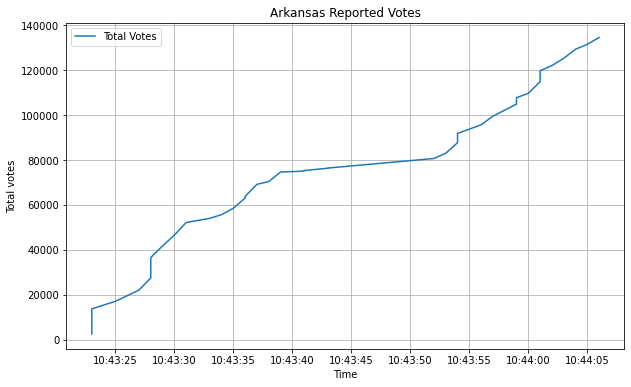

In [80]:

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(ak.last_updated, ak.cumul_votes, label = 'Total Votes')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Total votes')
ax.set_title('Arkansas Reported Votes')
ax.grid(True)
ax.legend(loc='upper left');

In [103]:
#Subsetting by states
ny = votecount[votecount.state=='NY']
ny.head()

,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
1998,NY,NY-G-P-2020-11-03,36001,Albany,121529,0,246,317,78,156602,78%,78% reported,edison,4,unknown,None,None,None,None,45570,73189,1258,NaN,478.0,NaN,NaN,460.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:31,22.72626,D+23,Biden +23,democrat,-22.72626,2
1999,NY,NY-G-P-2020-11-03,36003,Allegany,17271,0,28,34,82,20935,82%,82% reported,edison,2,unknown,None,None,None,None,12670,4188,278,NaN,69.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:32,49.11123,R+49,Trump +49,republican,49.11123,2
2000,NY,NY-G-P-2020-11-03,36005,Bronx,329638,0,706,959,74,447465,74%,74% reported,edison,2,unknown,None,None,None,None,55849,271835,607,NaN,327.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:33,65.52218,D+66,Biden +66,democrat,-65.52218,2
2001,NY,NY-G-P-2020-11-03,36047,Brooklyn,693937,0,1331,1730,77,902278,77%,77% reported,edison,2,unknown,None,None,None,None,174731,514133,1852,NaN,517.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:44,48.90963,D+49,Biden +49,democrat,-48.90963,2
2002,NY,NY-G-P-2020-11-03,36007,Broome,72251,0,106,141,75,96401,75%,75% reported,edison,4,unknown,None,None,None,None,38296,32209,900,NaN,293.0,NaN,NaN,237.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:34,8.4248,R+8,Trump +8,republican,8.4248,2


In [104]:
#Sorting by time of last update
ny = ny.sort_values(by=['last_updated'],ascending =1)
ny = ny.reset_index()
ny.head()

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,2057,NY,NY-G-P-2020-11-03,36119,Westchester,625318,0,942,942,99,630000,>98%,>98% reported,edison,2,none,None,None,None,None,217725,400881,3518,NaN,1637.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,29.29006,D+29,Biden +29,democrat,-29.29006,2
1,2058,NY,NY-G-P-2020-11-03,36121,Wyoming,17162,0,35,40,89,19374,89%,89% reported,edison,2,unknown,None,None,None,None,12969,3840,228,NaN,74.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,53.1931,R+53,Trump +53,republican,53.1931,2
2,2059,NY,NY-G-P-2020-11-03,36123,Yates,8817,0,14,18,78,11274,78%,78% reported,edison,2,unknown,None,None,None,None,5552,3046,143,NaN,44.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:29,28.42237,R+28,Trump +28,republican,28.42237,2
3,1998,NY,NY-G-P-2020-11-03,36001,Albany,121529,0,246,317,78,156602,78%,78% reported,edison,4,unknown,None,None,None,None,45570,73189,1258,NaN,478.0,NaN,NaN,460.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:31,22.72626,D+23,Biden +23,democrat,-22.72626,2
4,1999,NY,NY-G-P-2020-11-03,36003,Allegany,17271,0,28,34,82,20935,82%,82% reported,edison,2,unknown,None,None,None,None,12670,4188,278,NaN,69.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:32,49.11123,R+49,Trump +49,republican,49.11123,2


In [105]:
# Creating a cumulative total of votes column
ny['cumul_votes'] = ny['votes'][1]
ny['cumul_absentee'] = ny['absentee_votes'][1]
for i in range(1,len(ny)):
    ny['cumul_votes'][i] = ny['cumul_votes'][i-1]+ny['votes'][i]
    ny['cumul_absentee'][i] = ny['cumul_absentee'][i-1]+ny['absentee_votes'][i]
    
ny.head()

<ipython-input-105-0afae7c0fdb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['cumul_votes'][i] = ny['cumul_votes'][i-1]+ny['votes'][i]
<ipython-input-105-0afae7c0fdb4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny['cumul_absentee'][i] = ny['cumul_absentee'][i-1]+ny['absentee_votes'][i]


,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes,cumul_absentee
0,2057,NY,NY-G-P-2020-11-03,36119,Westchester,625318,0,942,942,99,630000,>98%,>98% reported,edison,2,none,None,None,None,None,217725,400881,3518,NaN,1637.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,29.29006,D+29,Biden +29,democrat,-29.29006,2,17162,0
1,2058,NY,NY-G-P-2020-11-03,36121,Wyoming,17162,0,35,40,89,19374,89%,89% reported,edison,2,unknown,None,None,None,None,12969,3840,228,NaN,74.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:28,53.1931,R+53,Trump +53,republican,53.1931,2,34324,0
2,2059,NY,NY-G-P-2020-11-03,36123,Yates,8817,0,14,18,78,11274,78%,78% reported,edison,2,unknown,None,None,None,None,5552,3046,143,NaN,44.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:29,28.42237,R+28,Trump +28,republican,28.42237,2,43141,0
3,1998,NY,NY-G-P-2020-11-03,36001,Albany,121529,0,246,317,78,156602,78%,78% reported,edison,4,unknown,None,None,None,None,45570,73189,1258,NaN,478.0,NaN,NaN,460.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:31,22.72626,D+23,Biden +23,democrat,-22.72626,2,164670,0
4,1999,NY,NY-G-P-2020-11-03,36003,Allegany,17271,0,28,34,82,20935,82%,82% reported,edison,2,unknown,None,None,None,None,12670,4188,278,NaN,69.0,NaN,NaN,0.0,0,0,0,NaN,0.0,NaN,NaN,0.0,2020-11-04 10:43:32,49.11123,R+49,Trump +49,republican,49.11123,2,181941,0


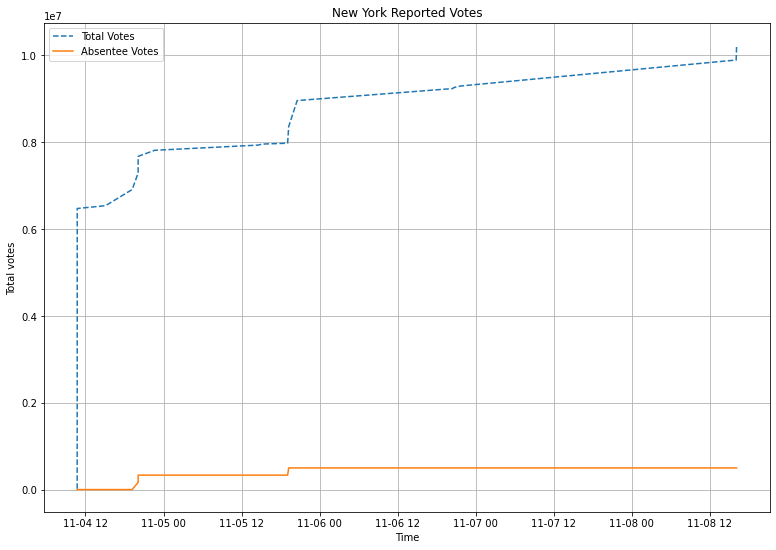

In [106]:
fig, ax = plt.subplots(figsize=(13, 9))

# Specify how our lines should look
ax.plot(ny.last_updated, ny.cumul_votes, label = 'Total Votes',linestyle='--')
ax.plot(ny.last_updated, ny.cumul_absentee, label = 'Absentee Votes')
#ax.plot(ny.last_updated, ny['results-trumpd'], label = 'Absentee Votes')
#ax.plot(ny.last_updated, ny['results-bidenj'], label = 'Absentee Votes')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Total votes')
ax.set_title('New York Reported Votes')
ax.grid(True)
ax.legend(loc='upper left');

In [107]:
pa = votecount[votecount.state=='PA']
pa.head()


,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
2261,PA,PA-G-P-2020-11-03,42001,Adams,37193,0,34,50,68,55087,68%,68% reported,edison,4,none,None,3456,None,None,29944,6611,544,NaN,NaN,NaN,NaN,94.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:49,62.73492,R+63,Trump +63,republican,62.73492,2
2262,PA,PA-G-P-2020-11-03,42003,Allegheny,529244,171838,928,1323,70,754132,70%,70% reported,edison,4,unknown,None,44826,None,None,237435,283368,6441,NaN,NaN,NaN,NaN,2000.0,31950,138425,1463,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:51,8.67898,D+9,Biden +9,democrat,-8.67898,2
2263,PA,PA-G-P-2020-11-03,42005,Armstrong,28848,0,49,62,81,35454,81%,81% reported,edison,2,unknown,None,2059,None,None,24233,4275,340,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:51,69.18331,R+69,Trump +69,republican,69.18331,2
2264,PA,PA-G-P-2020-11-03,42007,Beaver,63792,0,85,129,66,96942,66%,66% reported,edison,2,unknown,None,6320,None,None,45464,17304,851,NaN,NaN,NaN,NaN,173.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:51,44.14347,R+44,Trump +44,republican,44.14347,2
2265,PA,PA-G-P-2020-11-03,42009,Bedford,27018,5369,39,40,100,26973,>98%,>98% reported,edison,6,unknown,None,2106,None,None,22529,4266,178,NaN,NaN,NaN,NaN,45.0,2872,2424,55,NaN,NaN,NaN,NaN,18.0,2020-11-04 10:43:52,67.59568,R+68,Trump +68,republican,67.59568,2


In [108]:
#Sorting by time of last update
pa = pa.sort_values(by=['last_updated'],ascending =1)
pa = pa.reset_index()
pa.head()

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER
0,2288,PA,PA-G-P-2020-11-03,42055,Franklin,59351,0,54,73,73,80888,73%,73% reported,edison,4,none,None,4866,None,None,48912,9483,813,NaN,NaN,NaN,NaN,143.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,66.43359,R+66,Trump +66,republican,66.43359,2
1,2291,PA,PA-G-P-2020-11-03,42061,Huntingdon,22657,0,57,58,100,22097,>98%,>98% reported,edison,2,none,None,1354,None,None,16937,5389,280,NaN,NaN,NaN,NaN,51.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,50.9688,R+51,Trump +51,republican,50.9688,2
2,2290,PA,PA-G-P-2020-11-03,42059,Greene,13055,0,30,42,74,17676,74%,74% reported,edison,2,unknown,None,1218,None,None,10708,2210,137,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,65.09383,R+65,Trump +65,republican,65.09383,2
3,2289,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7592,>98%,>98% reported,edison,2,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,2
4,6915,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7668,>98%,>98% reported,edison,4,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,1466


In [111]:
# Creating a cumulative total of votes column, absentee and in person
pa['cumul_votes'] = pa['votes'][1]
pa['cumul_absentee'] = pa['absentee_votes'][1]
pa['cumul_inperson'] = pa['votes'][1] - pa['absentee_votes'][1]
for i in range(1,len(pa)):
    pa['cumul_votes'][i] = pa['cumul_votes'][i-1]+pa['votes'][i]
    pa['cumul_absentee'][i] = pa['cumul_absentee'][i-1]+pa['absentee_votes'][i]
    pa['cumul_inperson'][i] = (pa['cumul_votes'][i-1]+pa['votes'][i])-(pa['cumul_absentee'][i-1]+pa['absentee_votes'][i])
    
    
pa.head()

<ipython-input-111-d60a99627334>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['cumul_votes'][i] = pa['cumul_votes'][i-1]+pa['votes'][i]
<ipython-input-111-d60a99627334>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['cumul_absentee'][i] = pa['cumul_absentee'][i-1]+pa['absentee_votes'][i]
<ipython-input-111-d60a99627334>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pa['cumul_inperson'][i] = (pa['cumul_votes'][i-1]+pa['vo

,index,state,race_id,fips,name,votes,absentee_votes,reporting,precincts,eevp,tot_exp_vote,eevp_value,eevp_display,eevp_source,turnout_stage,absentee_count_progress,absentee_outstanding,absentee_max_ballots,provisional_outstanding,provisional_count_progress,results-trumpd,results-bidenj,results-jorgensenj,results-venturaj,results-pierceb,results-blankenshipd,results-de_la_fuenter,results-write-ins,results_absentee-trumpd,results_absentee-bidenj,results_absentee-jorgensenj,results_absentee-venturaj,results_absentee-pierceb,results_absentee-blankenshipd,results_absentee-de_la_fuenter,results_absentee-write-ins,last_updated,leader_margin_value,leader_margin_display,leader_margin_name_display,leader_party_id,margin2020,UPDATE_NUMBER,cumul_votes,cumul_absentee,cumul_inperson
0,2288,PA,PA-G-P-2020-11-03,42055,Franklin,59351,0,54,73,73,80888,73%,73% reported,edison,4,none,None,4866,None,None,48912,9483,813,NaN,NaN,NaN,NaN,143.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,66.43359,R+66,Trump +66,republican,66.43359,2,22657,0,22657
1,2291,PA,PA-G-P-2020-11-03,42061,Huntingdon,22657,0,57,58,100,22097,>98%,>98% reported,edison,2,none,None,1354,None,None,16937,5389,280,NaN,NaN,NaN,NaN,51.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,50.9688,R+51,Trump +51,republican,50.9688,2,45314,0,45314
2,2290,PA,PA-G-P-2020-11-03,42059,Greene,13055,0,30,42,74,17676,74%,74% reported,edison,2,unknown,None,1218,None,None,10708,2210,137,NaN,NaN,NaN,NaN,0.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,65.09383,R+65,Trump +65,republican,65.09383,2,58369,0,58369
3,2289,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7592,>98%,>98% reported,edison,2,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,2,66176,0,66176
4,6915,PA,PA-G-P-2020-11-03,42057,Fulton,7807,0,13,13,100,7668,>98%,>98% reported,edison,4,unknown,None,456,None,None,6660,1068,65,NaN,NaN,NaN,NaN,14.0,0,0,0,NaN,NaN,NaN,NaN,0.0,2020-11-04 10:43:28,71.62803,R+72,Trump +72,republican,71.62803,1466,73983,0,73983


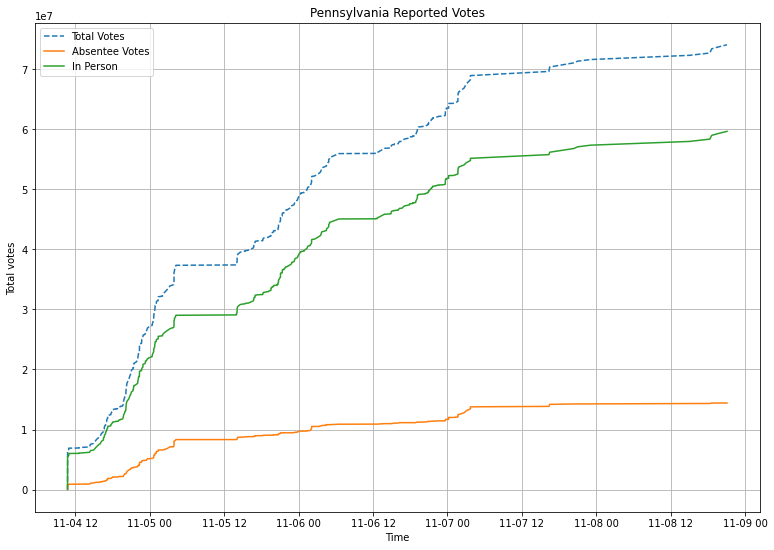

In [112]:
fig, ax = plt.subplots(figsize=(13, 9))

# Specify how our lines should look
ax.plot(pa.last_updated, pa.cumul_votes, label = 'Total Votes',linestyle='--')
ax.plot(pa.last_updated, pa.cumul_absentee, label = 'Absentee Votes')
ax.plot(pa.last_updated, pa.cumul_inperson, label = 'In Person')
#ax.plot(ny.last_updated, ny['results-trumpd'], label = 'Absentee Votes')
#ax.plot(ny.last_updated, ny['results-bidenj'], label = 'Absentee Votes')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Total votes')
ax.set_title('Pennsylvania Reported Votes')
ax.grid(True)
ax.legend(loc='upper left');